# Baseline models performances

In this notebook we train baseline models such as logistic regressions, support vector machines and random forest and use cross-validation to get the best hyper-parameters. Even if they obviously won't give the best accuracies, it's important to know how well they perform and see what we can expect from them.

In [1]:
%cd ..

/home/quentin/Documents/Courses/Deep learning/Projects/project1/src


In [30]:
import numpy as np

from utils.loading import load_data
from baseline_model import BaselineModel

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
one_khz = False

x_train, y_train = load_data(one_khz=one_khz)
x_test, y_test = load_data(train=False, one_khz=one_khz)

## Logistic regression

The first baseline model that we train is the logistic regression. We use cross-validation to tune the parameter `C` (which controls the regularization).

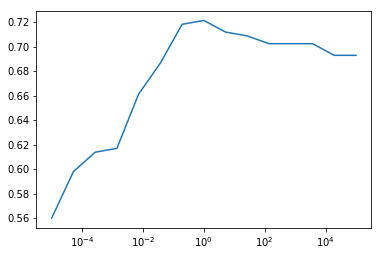

In [36]:
model = BaselineModel(model='logistic')

params = dict(C=np.logspace(-5, 5, 15))

clf = model.tune_params(params, x_train, y_train, standardize=True)

plt.semilogx(params['C'], clf.cv_results_['mean_test_score'])

In [37]:
C_tuned = params['C'][np.argmax(clf.cv_results_['mean_test_score'])]

model = BaselineModel(model='logistic', C=C_tuned)
logistic_cross_val = model.cross_validation(x_train, y_train, standardize=True, raw=True)

In [11]:
model.fit(x_train, y_train, standardize=True)
model.compute_accuracy(x_test, y_test)

0.73

## Support vector machines

We train here a support vector machines classifier.

In [34]:
model = BaselineModel(model='svm')

params = dict(C=np.logspace(-5, 5, 15), kernel=['rbf', 'linear', 'poly', 'sigmoid'])

clf = model.tune_params(params, x_train, y_train, standardize=True)

print('The best score is {0} with the parameters {1}'.format(round(clf.best_score_, 4), clf.best_params_))

The best score is 0.731 with the parameters {'C': 0.037275937203149416, 'kernel': 'linear'}


In [35]:
tuned_params = clf.best_params_

model = BaselineModel(model='svm', C=tuned_params['C'], kernel=tuned_params['kernel'])
svm_cross_val = model.cross_validation(x_train, y_train, standardize=True, raw=True)

In [28]:
model.fit(x_train, y_train, standardize=True)
model.compute_accuracy(x_test, y_test)

0.7

## Random forest

Finally we train a random forest classifier. For this kind of classifier, the accuracy usually increases as the number of the estimators in the forest increases. Thus, the larger it is, the better results we can expect. However, we restraint it to 200 for the parameters tuning because it increases the computation time a lot.

In [29]:
model = BaselineModel(model='forest')

params = dict(n_estimators=np.arange(10, 200, 40),
              criterion=['gini', 'entropy'],
              max_features = [None, 'log2', 'sqrt', 'auto'],
              min_samples_leaf = [1, 2, 4, 16],
              max_depth = np.array([1, 2, 4, 8, 16, 32, None]))

clf = model.tune_params(params, x_train, y_train, standardize=True)

print('The best score is {0} with the parameters {1}'.format(round(clf.best_score_, 4), clf.best_params_))

The best score is 0.6392 with the parameters {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 130}


In [31]:
tuned_params = clf.best_params_

model = BaselineModel(model='forest', n_estimators=tuned_params['n_estimators'],
                      criterion=tuned_params['criterion'],
                      max_features=tuned_params['max_features'],
                      min_samples_leaf=tuned_params['min_samples_leaf'],
                      max_depth=tuned_params['max_depth'])

forest_cross_val = model.cross_validation(x_train, y_train, standardize=True, raw=True)

## Results

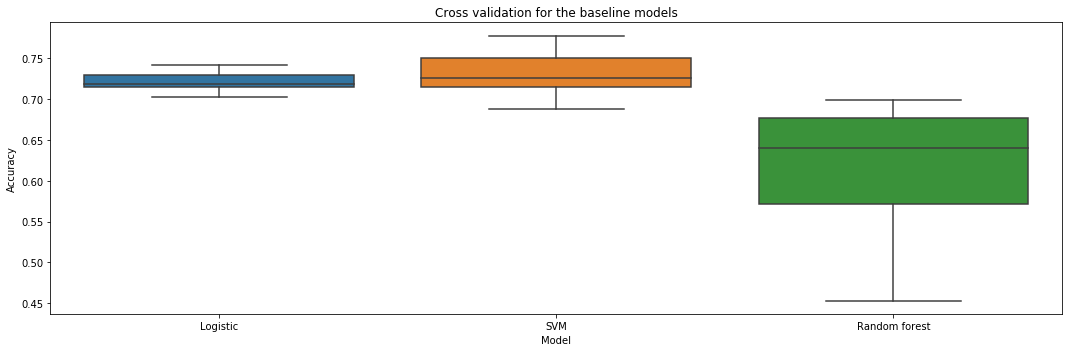

In [40]:
fig, ax = plt.subplots(figsize=(15,5))

sns.boxplot(data=[logistic_cross_val, svm_cross_val, forest_cross_val], ax=ax)
ax.set_title('Cross validation for the baseline models')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_xticklabels(['Logistic', 'SVM', 'Random forest'], fontsize=10)

plt.tight_layout()

plt.show()